In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use("fivethirtyeight")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv",parse_dates=["Date"])

In [3]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [4]:
df["Total Cases"]=df[["Confirmed","Recovered","Deaths"]].sum(axis=1)

In [5]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


In [6]:
worldwide=df.groupby(["Date"]).sum()

In [7]:
worldwide.head()

,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2020-01-22,557,30,17,604
2020-01-23,655,32,18,705
2020-01-24,941,39,26,1006
2020-01-25,1433,42,42,1517
2020-01-26,2118,56,56,2230


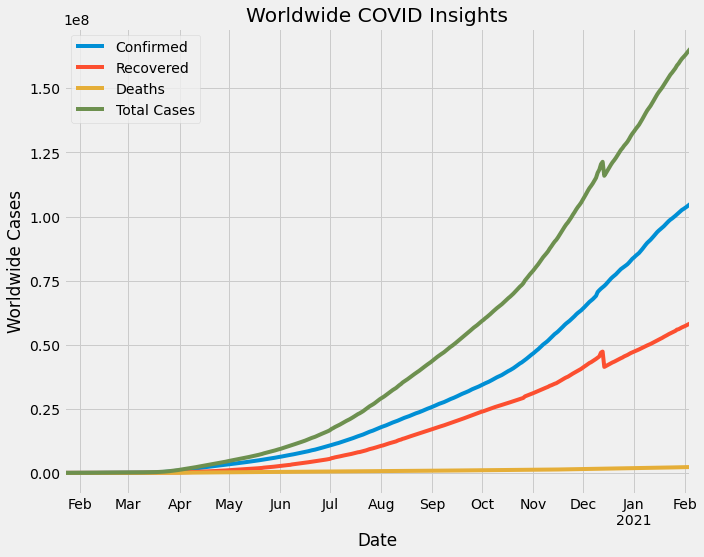

In [8]:
w_chart=worldwide.plot(figsize=(10,8))
w_chart.set_xlabel("Date")
w_chart.set_ylabel("Worldwide Cases")
w_chart.title.set_text("Worldwide COVID Insights")
plt.show()

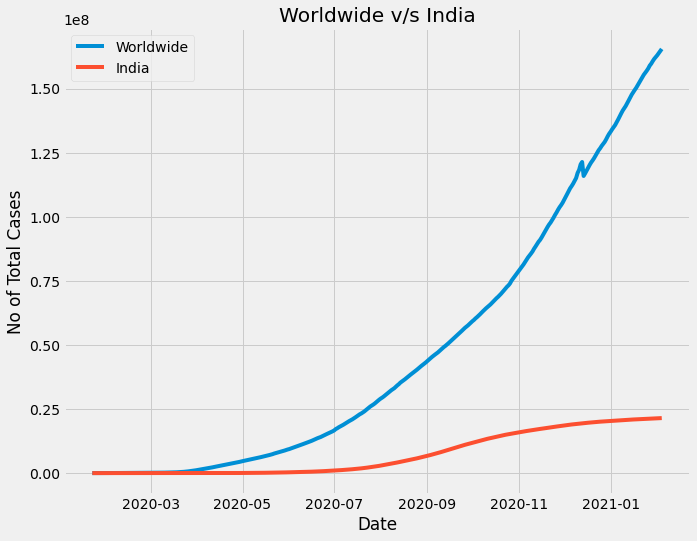

In [9]:
ind_df=df[df["Country"]=="India"].groupby(["Date"]).sum()
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111) #111 means 1x1 grid and 1st subplot
ax.plot(worldwide["Total Cases"], label="Worldwide")
ax.plot(ind_df["Total Cases"], label="India")
ax.set_xlabel("Date")
ax.set_ylabel("No of Total Cases")
ax.title.set_text("Worldwide v/s India")
plt.legend(loc="upper left")
plt.show()

In [10]:
ind_df=ind_df.reset_index()
ind_df["Daily Confirmed"]=ind_df["Confirmed"].sub(ind_df["Confirmed"].shift())
ind_df["Daily Deaths"]=ind_df["Deaths"].sub(ind_df["Deaths"].shift())
ind_df

,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed,Daily Deaths
0,2020-01-22,0,0,0,0,NaN,NaN
1,2020-01-23,0,0,0,0,0.0,0.0
2,2020-01-24,0,0,0,0,0.0,0.0
3,2020-01-25,0,0,0,0,0.0,0.0
4,2020-01-26,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...
375,2021-01-31,10757610,10434983,154392,21346985,11436.0,118.0
376,2021-02-01,10766245,10448406,154486,21369137,8635.0,94.0
377,2021-02-02,10777284,10462631,154596,21394511,11039.0,110.0
378,2021-02-03,10790183,10480455,154703,21425341,12899.0,107.0


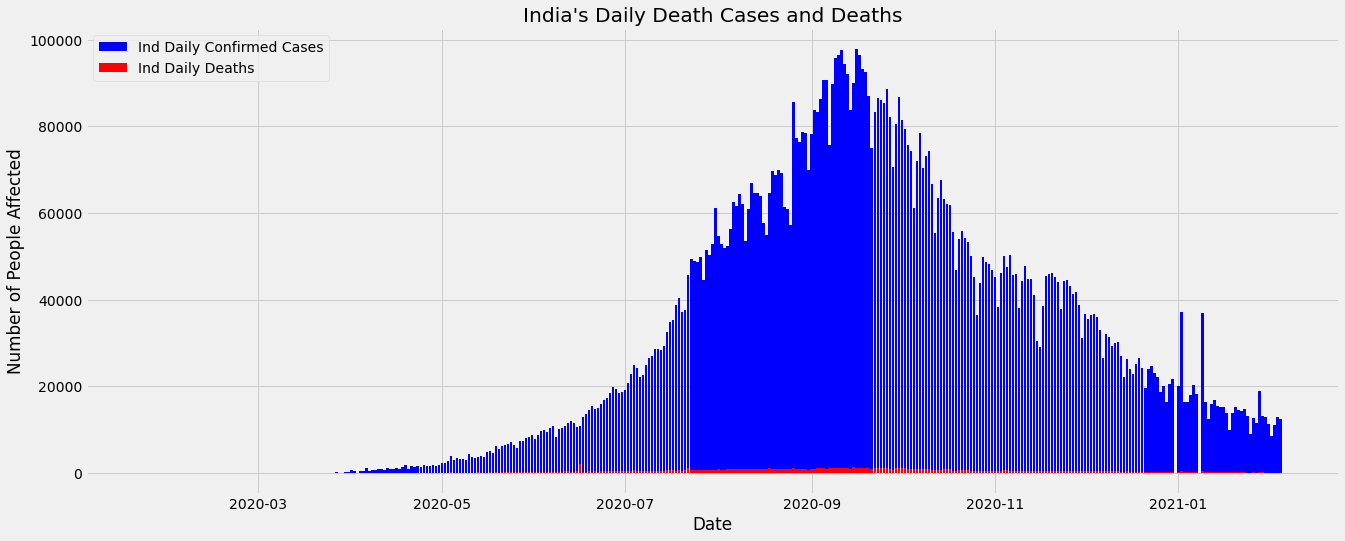

In [11]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)
ax.bar(ind_df["Date"],ind_df["Daily Confirmed"],color="b", label="Ind Daily Confirmed Cases")
ax.bar(ind_df["Date"],ind_df["Daily Deaths"],color="r", label="Ind Daily Deaths")
ax.set_xlabel("Date")
ax.set_ylabel("Number of People Affected")
ax.title.set_text("India's Daily Death Cases and Deaths")
plt.legend(loc="upper left")
plt.show()